In [1]:
"hello"

'hello'

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [40]:
def wrangle(path):
    
    # read the csv file
    df = pd.read_csv(path, index_col='InvoiceDate', parse_dates=['InvoiceDate'])

    # create the revenue col
    df['Revenue'] = df['Quantity'] * df['UnitPrice']

    # drop unecessary cols
    df.drop(columns=['Description', 'Quantity', 'UnitPrice', 'CustomerID', 'Country'], inplace=True)

    # resample to daily freq
    df = df.resample('D').mean().dropna()

    # return the transformed df
    return df

In [41]:
df = wrangle("C:/Users/HP PROBOOK/Documents/Cardio/Analysis/Online_Retail.csv")
df.head()

,Revenue
InvoiceDate,
2010-12-01,18.866010
2010-12-02,21.909569
2010-12-03,20.717738
2010-12-05,11.517046
2010-12-06,13.888649


In [42]:
adfuller(df)

(np.float64(-4.518185855518255),
 np.float64(0.00018228498361180445),
 11,
 293,
 {'1%': np.float64(-3.452867117291862),
  '5%': np.float64(-2.8714554160827745),
  '10%': np.float64(-2.5720532321867466)},
 np.float64(1917.904555639304))

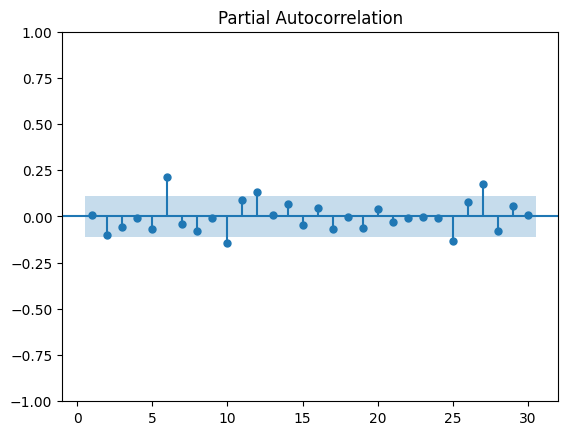

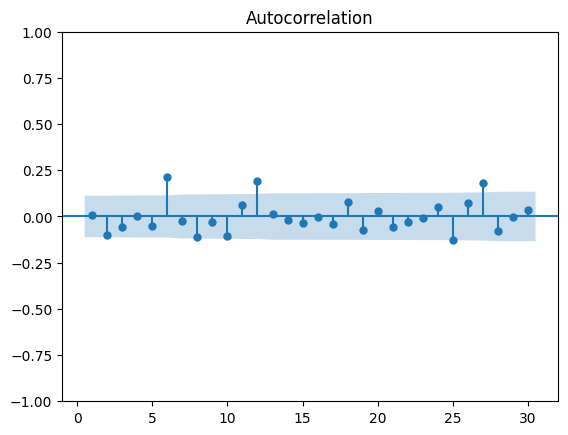

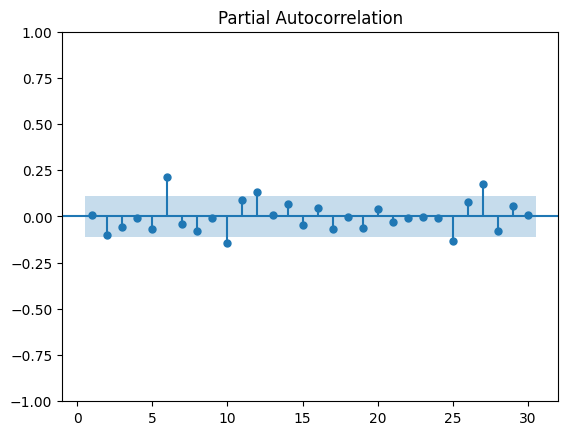

In [44]:
plot_acf(df, lags=30, zero=False)
plot_pacf(df, lags=30, zero=False)
